In [ ]:
from common import keep_viewer_in_scope, patch

patch()
_viewer = keep_viewer_in_scope()

%reset out

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from boilercv.captivate.previews import view_images
from boilercv.colors import RED, WHITE
from boilercv.data import VIDEO, YPX
from boilercv.data.sets import get_contours_df, get_dataset
from boilercv.images.cv import draw_contours
from boilercv.types import ArrInt

# Tracks

Bubble tracks.


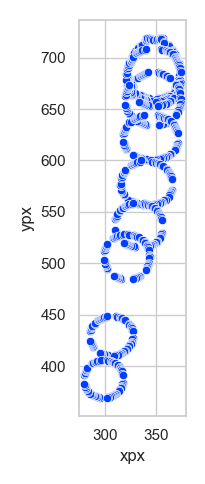

In [ ]:
EXAMPLE_UNOBSRUCTED_VIDEO = "2021-01-14T13-46-01"
frame = slice(0, 300)
df = (
    get_contours_df(EXAMPLE_UNOBSRUCTED_VIDEO)
    .loc[pd.IndexSlice[frame, :, :], :]
    .assign(
        **{
            "count": lambda df: df.loc[pd.IndexSlice[:, :], :]
            .groupby(level=("frame", "contour"))
            .count()[YPX]
        }
    )
)
df = df[df["count"] > 60].drop(columns="count")
fig, ax = plt.subplots()
sns.scatterplot(
    ax=ax, data=df.loc[pd.IndexSlice[140:300:10, :], ["xpx", "ypx"]], x="xpx", y="ypx"
)
ax.set_aspect("equal")

ds = get_dataset(EXAMPLE_UNOBSRUCTED_VIDEO, stage="large_sources", frame=frame)
frames_with_contours = df.index.get_level_values("frame").unique()
video = ds[VIDEO].values
result = np.zeros((*video.shape, 3))
result2 = np.zeros(video.shape)
for frame_num, frame in enumerate(video):
    if frame_num not in frames_with_contours:
        result[frame_num, :, :, :] = cv.cvtColor(frame, cv.COLOR_GRAY2RGB)
        continue
    contours: list[ArrInt] = list(
        df.loc[frame_num, :].groupby("contour").apply(lambda grp: grp.values)
    )
    result[frame_num, :, :, :] = draw_contours(
        cv.cvtColor(frame, cv.COLOR_GRAY2RGB), contours, color=RED, thickness=2  # type: ignore
    )
    result2[frame_num, :, :] = draw_contours(
        np.zeros(video.shape[1:]),  # type: ignore
        contours,
        color=WHITE,
        thickness=2,
    )

In [ ]:
# https://stackoverflow.com/a/4809040/20430423
frames = []
for frame in result2[140:300:10]:
    where = np.argwhere(frame)
    if not np.argwhere(frame).size:
        continue
    (ystart, xstart), (ystop, xstop) = where.min(0), where.max(0) + 1
    frames.append(frame[ystart:ystop, xstart:xstop])

In [ ]:
view_images(result[140:300])
view_images(frames)

## References

```{footbibliography}

```
